In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
NBA = pd.read_csv('/content/gdrive/My Drive/Data Projects/Thinkful - NBA Data Analytics/NBA.csv')

In [5]:
NBA.head()

,Player,TEAM,SS,AGE,Salary,PER,Games Played,Wins,Minutes,FGM,...,REB,AST,TO,STL,BLK,PF,DD2,TD3,PTS,+/-
0,Kobe Bryant,LAL,1,37,25000000,14.94,66,13,28.2,6.0,...,3.7,2.8,2.0,0.9,0.2,1.7,2,0,17.6,-8.7
1,LeBron James,CLE,1,31,22970500,27.64,76,56,35.6,9.7,...,7.4,6.8,3.3,1.4,0.6,1.9,28,3,25.3,8.1
2,Carmelo Anthony,NYK,1,32,22875000,20.38,72,32,35.1,7.9,...,7.7,4.2,2.4,0.9,0.5,2.5,22,0,21.8,-0.6
3,Dwight Howard,HOU,1,30,22359364,18.99,71,34,32.1,5.2,...,11.8,1.4,2.3,1.0,1.6,3.1,38,0,13.7,0.2
4,Chris Bosh,MIA,1,32,22192730,20.29,53,29,33.5,6.8,...,7.4,2.4,1.5,0.7,0.6,1.9,15,0,19.1,0.6


In [6]:
NBA["log_salary"]=np.log10(NBA['Salary'])
NBA["Salary_PER_ratio"] = NBA['Salary']/NBA['PER']
Differential = NBA['+/-']
Median = NBA.groupby('TEAM')[['Salary', 'PER', 'FGM', 'PTS','+/-']].median()

In [7]:
NBA.head()

,Player,TEAM,SS,AGE,Salary,PER,Games Played,Wins,Minutes,FGM,...,TO,STL,BLK,PF,DD2,TD3,PTS,+/-,log_salary,Salary_PER_ratio
0,Kobe Bryant,LAL,1,37,25000000,14.94,66,13,28.2,6.0,...,2.0,0.9,0.2,1.7,2,0,17.6,-8.7,7.397940,1.673360e+06
1,LeBron James,CLE,1,31,22970500,27.64,76,56,35.6,9.7,...,3.3,1.4,0.6,1.9,28,3,25.3,8.1,7.361170,8.310601e+05
2,Carmelo Anthony,NYK,1,32,22875000,20.38,72,32,35.1,7.9,...,2.4,0.9,0.5,2.5,22,0,21.8,-0.6,7.359361,1.122424e+06
3,Dwight Howard,HOU,1,30,22359364,18.99,71,34,32.1,5.2,...,2.3,1.0,1.6,3.1,38,0,13.7,0.2,7.349459,1.177428e+06
4,Chris Bosh,MIA,1,32,22192730,20.29,53,29,33.5,6.8,...,1.5,0.7,0.6,1.9,15,0,19.1,0.6,7.346211,1.093777e+06


# NBA Player Statistics Data (from 2015 - 2016 Season)

# Introduction

This data was released by the NBA (the National Basketball Association, which is the professional basketball league based in the United States of America).  The data presents player statistics in the following categories: points per game, blocks per game, assists per game, turnovers per game, Player Efficiency Rating (PER), +/- (score differential), and more.  This set of data is from the 2015 - 2016 season.  The NBA consists of 30 teams various cities across North America.  The data displays the teams in the form of its city's abbreviations.

In this Analysis, 3 questions were evaluated: 1) Do younger players play more effectively? 2) Which teams pay higher salaries based on performance? Which teams pay higher for its players? Which teams tend to over-pay their players? 3) Which factors correlate the most to player salaries?

# 1 - Do younger players play more effectively?

Player effectiveness was measured in 2 ways: Player Efficiency Rating (PER) and Adjusted Plus Minus (+/-).

The Player Efficiency Rating (PER) measures a player's per-minute productivity.  It adds up all the positive contributions a player makes to his team (such as Points Per Game, Assists Per Game, etc...), while subtracting the negative ones (such as Turnovers (TO), etc...) in a statistical point value system. It also adjusts for both pace and playing time to make it easier to compare players to one another.

The Adjusted Plus Minus is a direct measure of a player's overall contribution to his team's scoring margin after considering the strength of every player (teammate and opponent) on the court for every minute he is out there (+/-).  A player with a +5 player contribution demonstrates that his team's net rating would be five points per 100 possessions better than a lineup of five average players.

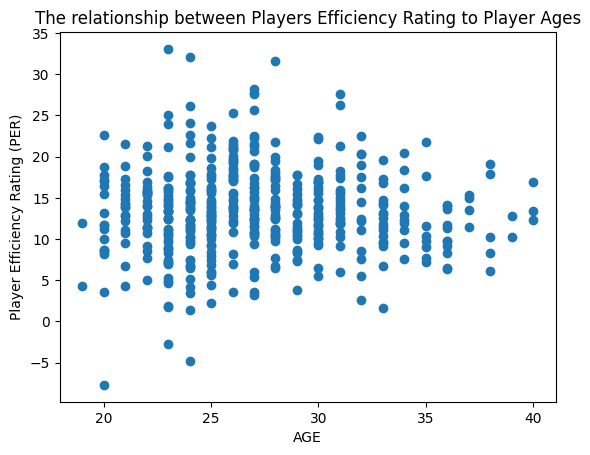

PearsonRResult(statistic=np.float64(0.0019020500036654835), pvalue=np.float64(0.966985971785975))

In [8]:
plt.scatter(x=NBA['AGE'], y=NBA['PER'])
plt.ylabel('Player Efficiency Rating (PER)')
plt.xlabel('AGE')
plt.title('The relationship between Players Efficiency Rating to Player Ages')
plt.show()
x=NBA.AGE
y=NBA.PER
pearsonr(x, y)

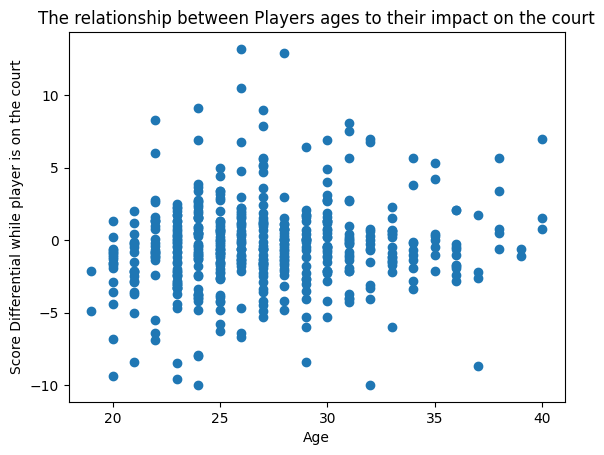

PearsonRResult(statistic=np.float64(0.12308916148200025), pvalue=np.float64(0.007173970719611904))

In [9]:
plt.scatter(x=NBA['AGE'], y=NBA['+/-'])
plt.ylabel('Score Differential while player is on the court')
plt.xlabel('Age')
plt.title('The relationship between Players ages to their impact on the court')
plt.show()
x=NBA.AGE
y=Differential
pearsonr(x, y)

There is no correlation between the player efficiency rating and the players' ages.  

This is based on a pearson coefficient of 0.0019 and a p-value of 0.967.  The p-value (0.967) is for testing if the correlation is 0.  The p-value less than 5% is in general considered to be statistically significant.  

There is a weak correlation between the score differential (+/-) on the court and the players' ages.  This is based on the correlation coefficient (0.12) and the p-value (0.00717).  The graph demonstrates that the players improve their effectiveness until their late 20s and then it decreases at around 30.  There was no evidence that younger players play more effectively since younger players are still learning to play in the NBA.

# 2-  Which teams pay higher salaries based on performance? Which teams pay higher for its players?  Which teams tend to over-pay their players?

To evaluate player performance, both the player efficiency rating (PER) and the adjusted plus minus (+/-) were considered.  Each of them were plotted against player salaries to determine the correlation between player salaries and player performance.

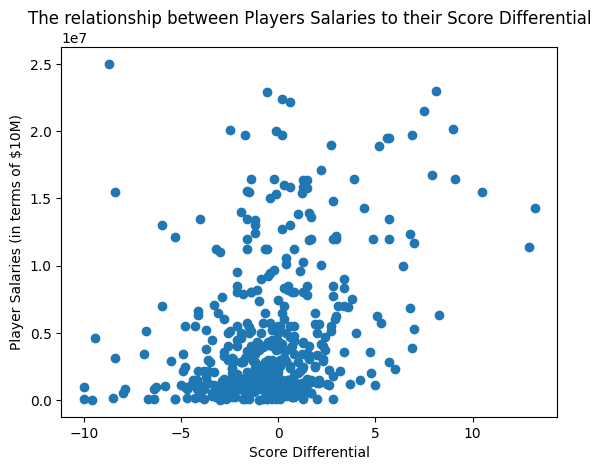

PearsonRResult(statistic=np.float64(0.3356421057610415), pvalue=np.float64(5.356547720808379e-14))

In [10]:
plt.scatter(x=NBA['+/-'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Score Differential')
plt.title('The relationship between Players Salaries to their Score Differential')
plt.show()
x=Differential
y=NBA.Salary
pearsonr(x, y)

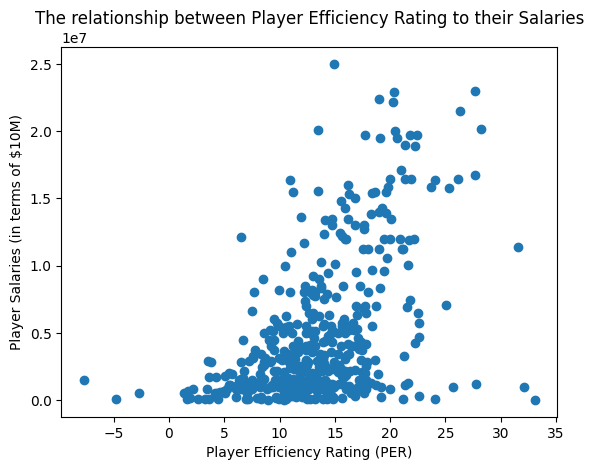

PearsonRResult(statistic=np.float64(0.4870484564891274), pvalue=np.float64(1.0057961239772961e-29))

In [11]:
plt.scatter(x=NBA['PER'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Player Efficiency Rating (PER)')
plt.title('The relationship between Player Efficiency Rating to their Salaries')
plt.show()
x=NBA.PER
y=NBA.Salary
pearsonr(x, y)

Based on the findings above, there is a relationship (r=0.336) between player salaries and their performance.  There is a stronger correlation (r=0.487) between player salaries to their player efficiency rating than to their adjusted plus minus (score differential).  Player salaries appear to be increasing exponentially over their efficiency ratings.

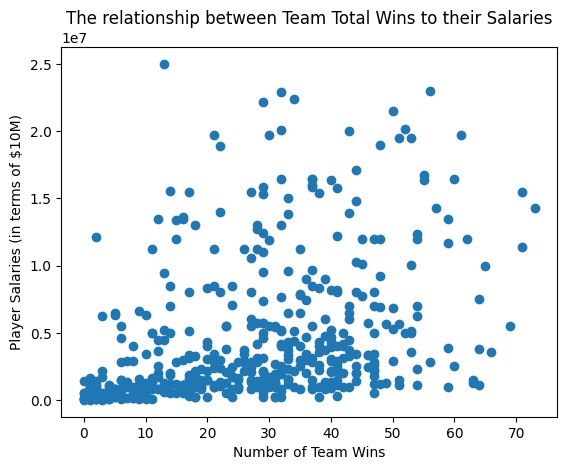

PearsonRResult(statistic=np.float64(0.3779824386804912), pvalue=np.float64(1.297234200632105e-17))

In [12]:
plt.scatter(x=NBA['Wins'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Number of Team Wins')
plt.title('The relationship between Team Total Wins to their Salaries')
plt.show()
x=NBA.Wins
y=NBA.Salary
pearsonr(x, y)

There also appears to be a correlation between the player salaries and the number of team wins.  This is based on a correlation coefficient of 0.378.

The following graphs show the median salary per team.  The Salary over PER ratio was determined for each team, and the median values were plotted for each team.  The graphs were sorted from highest to lowest.  The graphs combined show which teams pay its players the most and which teams pay its players appropriately based on performance.

In [13]:
Median_Salary_Sorted = Median.sort_values('Salary', ascending=False)

Text(0, 0.5, 'Median Salary per team (in terms of $10M)')

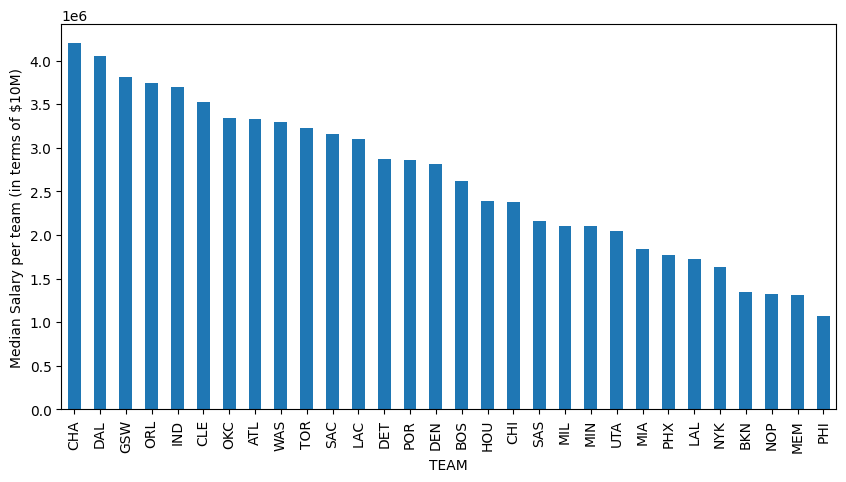

In [14]:
Median_Salary_Sorted.Salary.plot(kind='bar', figsize = (10, 5))
plt.ylabel('Median Salary per team (in terms of $10M)')

The graphs above show that Charlotte, Dallas, Golden State, Orlando, and Indiana pay their players the most out of the teams in the NBA.  Since none of the highest paying teams are big cities, big cities do not necessarily pay their players the most.

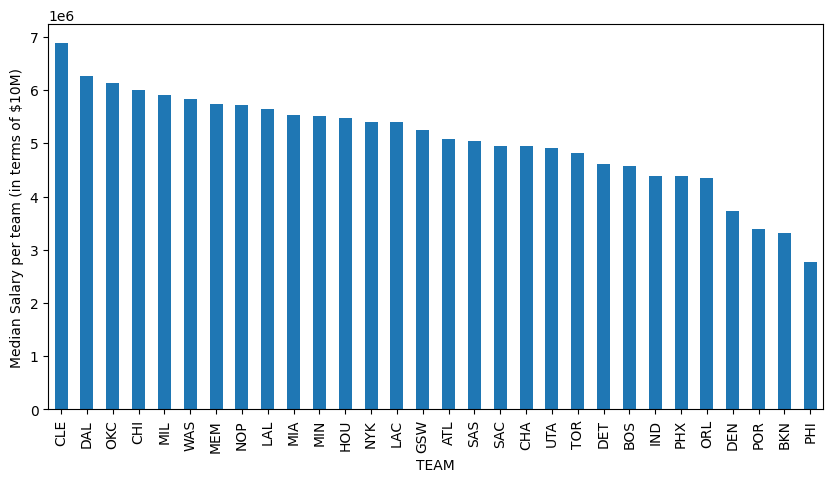

In [15]:
Median_Salary_PER_Sorted = NBA.groupby("TEAM")['Salary_PER_ratio'].sum()
Median_Salary_PER_Sorted = Median_Salary_PER_Sorted.sort_values(ascending=False)
Median_Salary_PER_Sorted.plot(kind='bar', figsize = (10, 5))
plt.ylabel('Median Salary per team (in terms of $10M)')
plt.show()

The graph of salary over PER per team show which teams overpay its players and which teams are paying its players appropriately based on performance.  The graphs also show that Oklahoma City, Washington (DC), Atlanta, Dallas, and Boston have the highest median salary per performance ratio.  This implies either that the teams players are paid the most or the its players' performance is weak.  Since only Dallas has one of the top 5 salaries in the league and one of the top 5 salary per PER ratio in the league is can be safe to say that they are paying its players appropriately.  Oklahoma City, Washington, Atlanta, and Boston all appear to be among the teams over-paying its players.

# 3 - What factors correlate the most to the players' salaries?

The players' salaries were plotted against the 4 game statistics to see which factors correlate the player salaries the most.  The 4 statistics include: points per game, blocks per game, assists per game, and turnovers per game.  Just because some factor correlates to the players' salaries does not mean it directly affects the players salaries.

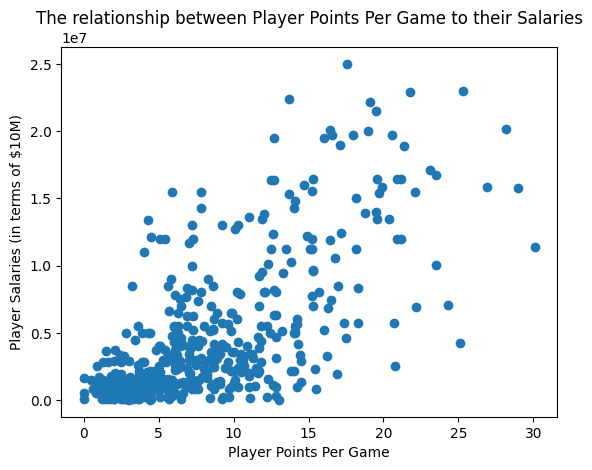

PearsonRResult(statistic=np.float64(0.6829472576455298), pvalue=np.float64(1.1892570407541352e-66))

In [16]:
plt.scatter(x=NBA['PTS'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Player Points Per Game')
plt.title('The relationship between Player Points Per Game to their Salaries')
plt.show()
x=NBA.PTS
y=NBA.Salary
pearsonr(x, y)

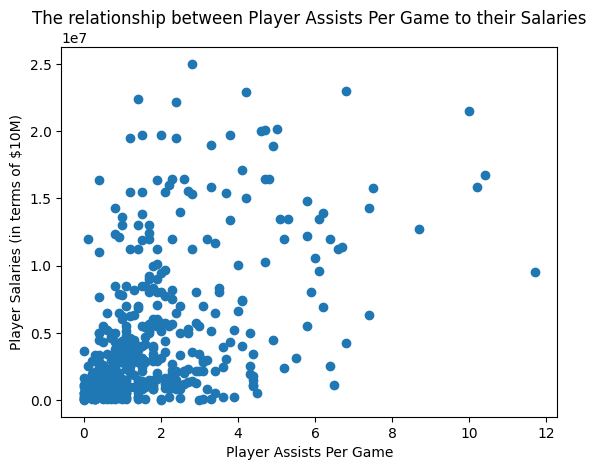

PearsonRResult(statistic=np.float64(0.49499413858106833), pvalue=np.float64(8.654953017266437e-31))

In [17]:
plt.scatter(x=NBA['AST'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Player Assists Per Game')
plt.title('The relationship between Player Assists Per Game to their Salaries')
plt.show()
x=NBA.AST
y=NBA.Salary
pearsonr(x, y)

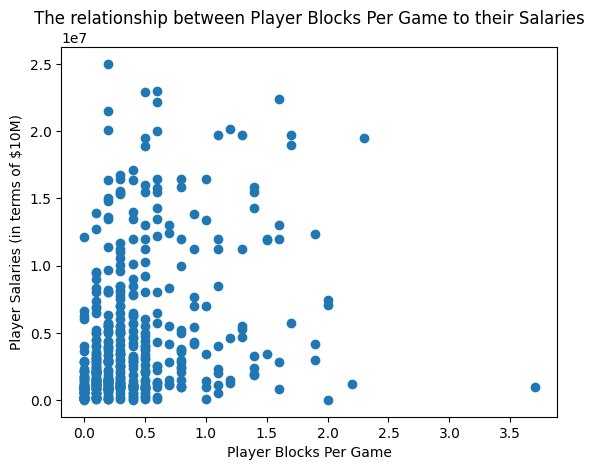

PearsonRResult(statistic=np.float64(0.30479946234855737), pvalue=np.float64(1.0846273249452798e-11))

In [18]:
plt.scatter(x=NBA['BLK'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Player Blocks Per Game')
plt.title('The relationship between Player Blocks Per Game to their Salaries')
plt.show()
x=NBA.BLK
y=NBA.Salary
pearsonr(x, y)

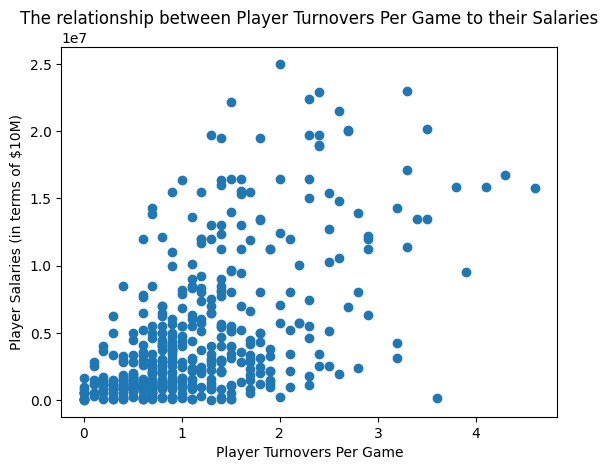

PearsonRResult(statistic=np.float64(0.580797144163616), pvalue=np.float64(2.793907151214731e-44))

In [19]:
plt.scatter(x=NBA['TO'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Player Turnovers Per Game')
plt.title('The relationship between Player Turnovers Per Game to their Salaries')
plt.show()
x=NBA.TO
y=NBA.Salary
pearsonr(x, y)

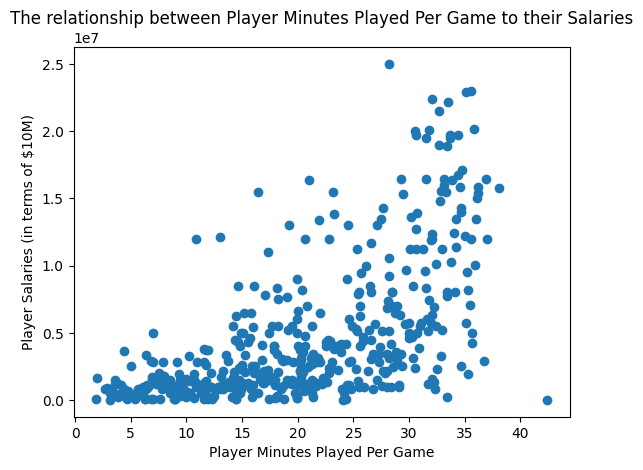

PearsonRResult(statistic=np.float64(0.6186230914625258), pvalue=np.float64(1.3166368515565538e-51))

In [20]:
plt.scatter(x=NBA['Minutes'], y=NBA['Salary'])
plt.ylabel('Player Salaries (in terms of $10M)')
plt.xlabel('Player Minutes Played Per Game')
plt.title('The relationship between Player Minutes Played Per Game to their Salaries')
plt.show()
x=NBA.Minutes
y=NBA.Salary
pearsonr(x, y)

The category that most correlates to player salaries is points per game (r=0.683).  The correlation shows that player salaries increase as players score more points per game.  Another category that most correlates to player salaries is turnovers per game (r=0.581).  Surprisingly, it appears that players who turn the ball over more get paid more.  There is also another graph that shows that players who play more minutes per game get paid more (r=0.619).  When a player plays more minutes per game, he can get more points, assists, and blocks per game.  However, he can also get more turnovers per game.

# Conclusion

Multiple conclusions can be drawn out of these analyses.  Player effectiveness peaks in their late 20s.  Therefore, there is no evidence that younger players play more effectively. 2) Players salaries appear to increase exponentially as player performance increases.  Player salaries appear to increase as team performance improves.  The top 5 teams with the highest median salaries were not big city teams.  Therefore, big city teams do not necessarily pay their teams the most. Dallas has one of the top 5 salaries in the NBA and one of the top 5 salary over PER ratio in the league, so they are likely paying its players appropriately. Oklahoma City, Washington, Atlanta, and Boston all appear to be among the teams over-paying its players.  The factor that most correlates to player salaries is points per game.  There is a correlation between player salaries to the player's minutes played.  When a player plays more minutes per game, he has room for assists and blocks but also room for turnovers.  There is a much stronger relationship between player salaries to their minutes than to their efficiencies.

Knowing that correlation does not imply causation, players are not solely paid for their performance.  The players that play more are paid more.  In fact, the highest paid players are the stars of the team, so fans come to see them.  Their performance may not be stable.

# Appendix Data Distributions

The following histograms show the distributions of the player salaries, log_salary, salary over PER ratio, and +/- (score differential).

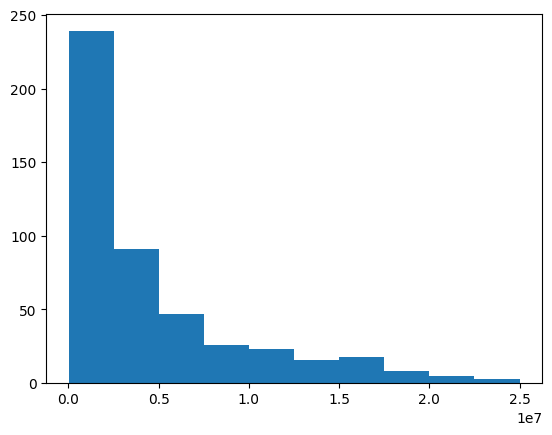

In [21]:
plt.hist(NBA['Salary'])
plt.show()

The distribution of the player salary appear to be skewed to the right.

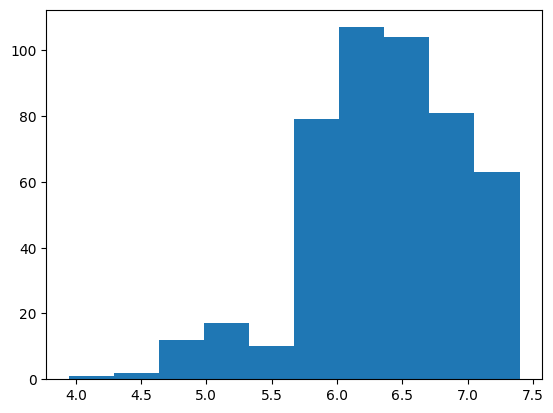

In [22]:
plt.hist(NBA['log_salary'])
plt.show()

However, the distribution of the log transformation of player salaries appear to be skewed to the left.

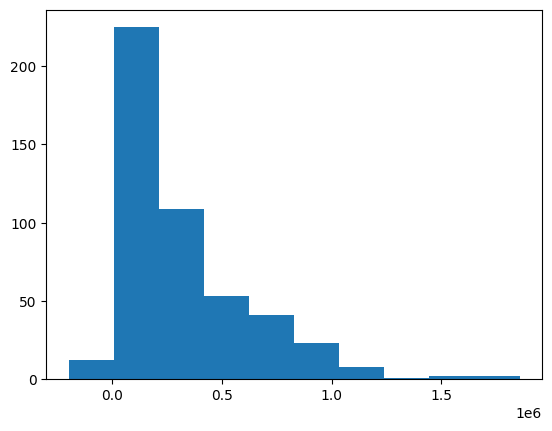

In [23]:
plt.hist(NBA['Salary_PER_ratio'])
plt.show()

Since the salary is skewed to the right, then salary to PER ratio is skewed to the right.

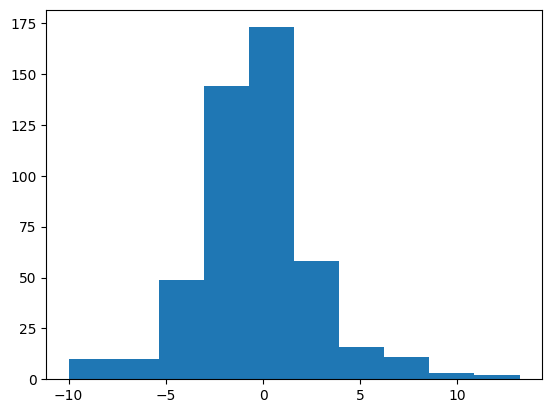

In [24]:
plt.hist(NBA['+/-'])
plt.show()

The distribution of the score differential appears to be normally distributed.

For more details, the following shows box and whisker plots by team for Player Efficiency Rating, score differential, and salary to PER ratio.

<Axes: title={'center': 'PER'}, xlabel='[TEAM]'>

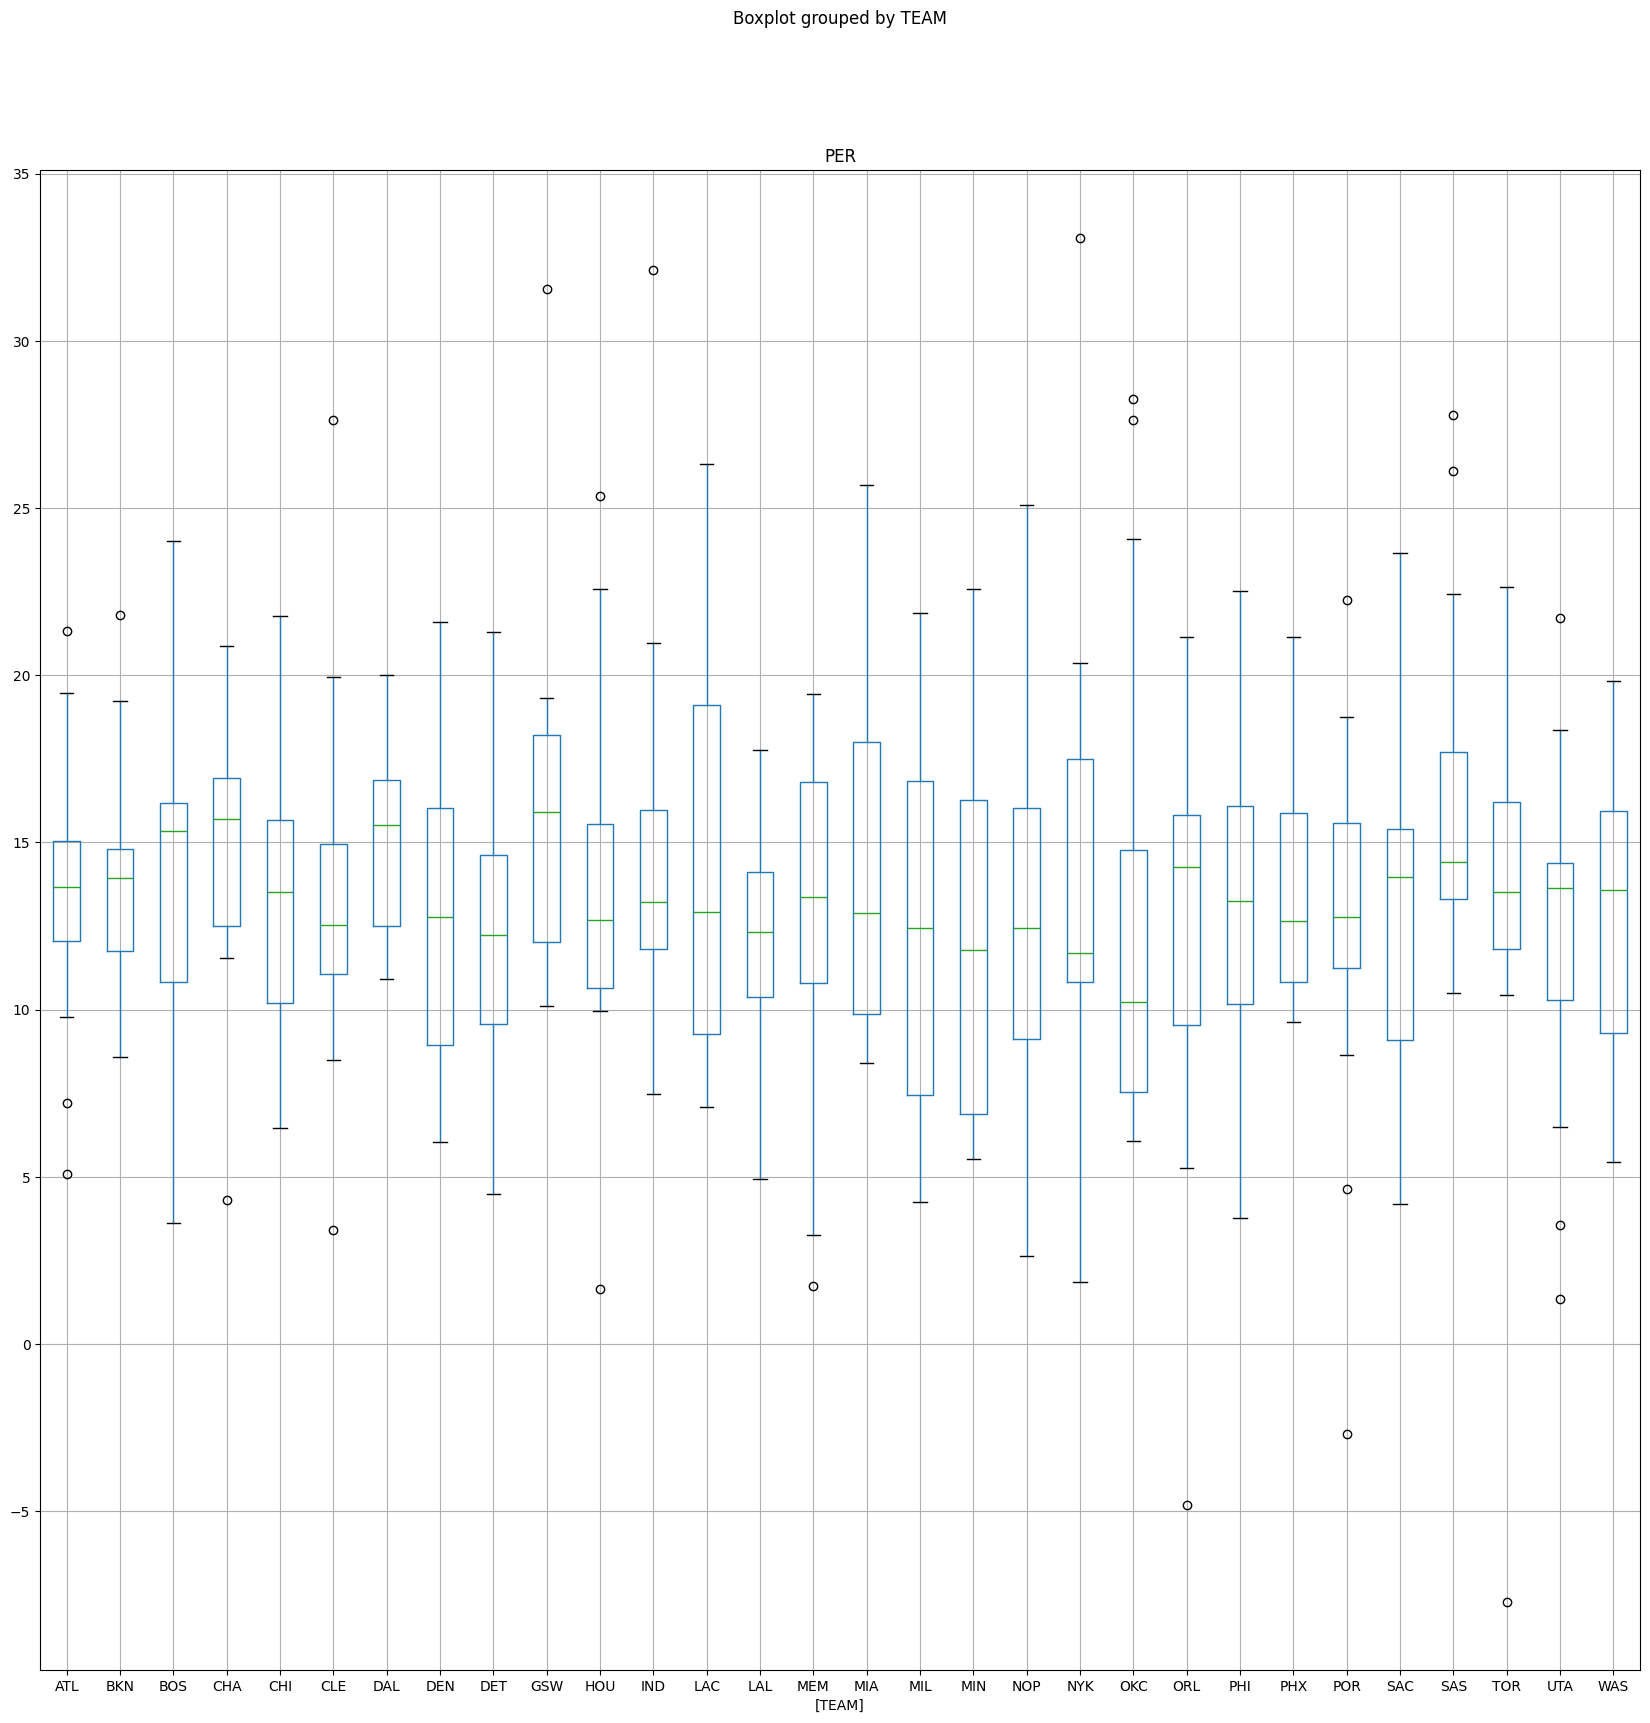

In [25]:
NBA[['PER', 'TEAM']].boxplot(by='TEAM', figsize=(20,20))

<Axes: title={'center': '+/-'}, xlabel='[TEAM]'>

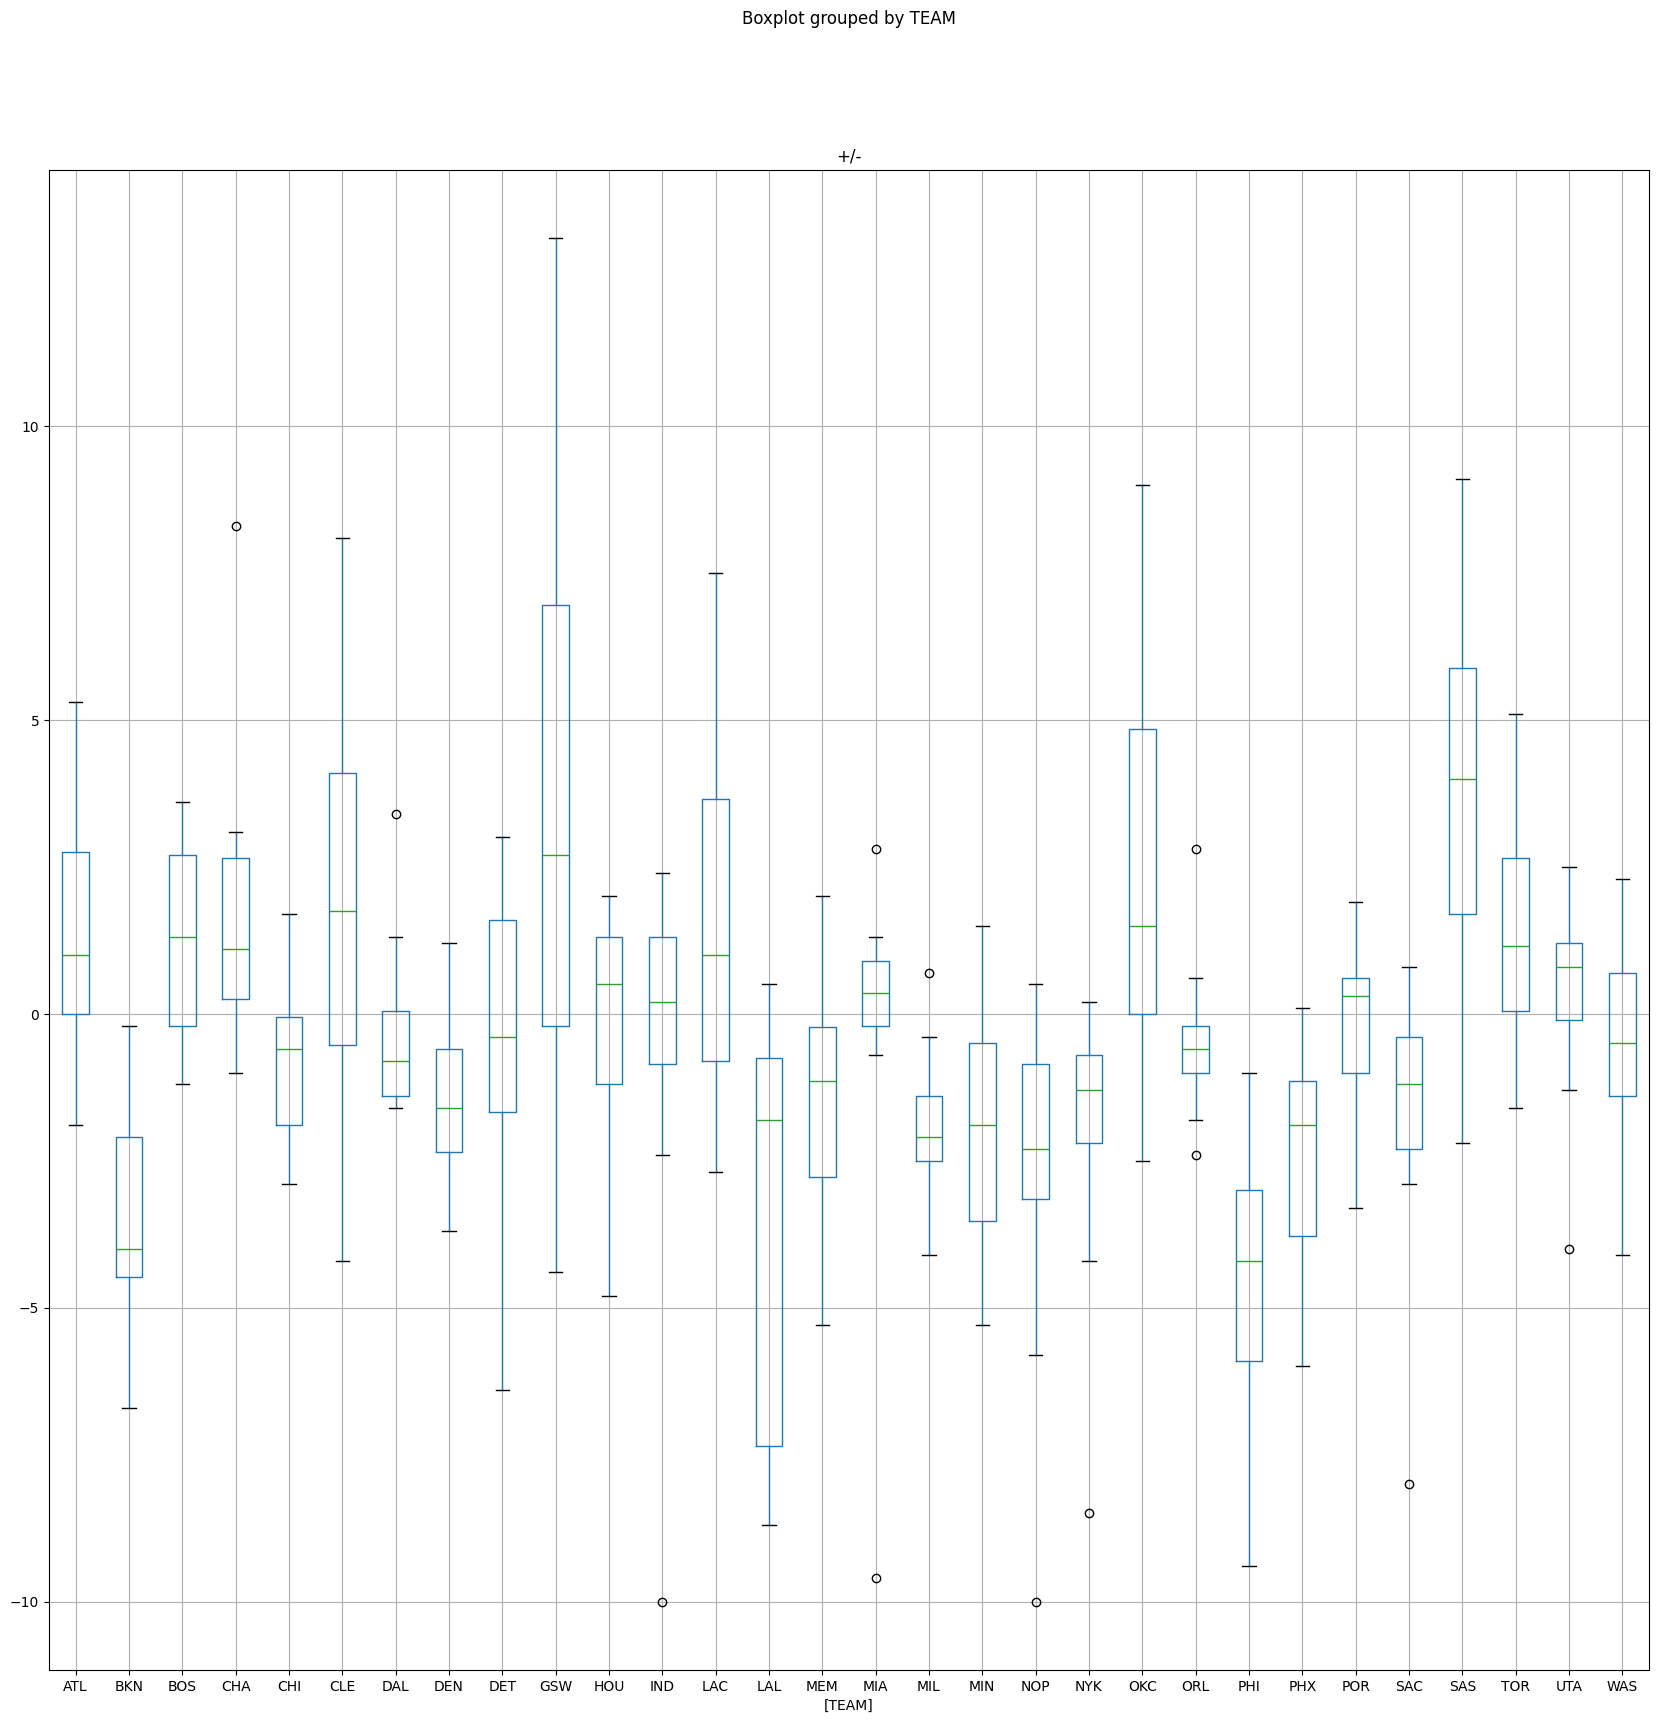

In [26]:
NBA[['+/-', 'TEAM']].boxplot(by='TEAM', figsize=(20,20))

<Axes: title={'center': 'Salary_PER_ratio'}, xlabel='[TEAM]'>

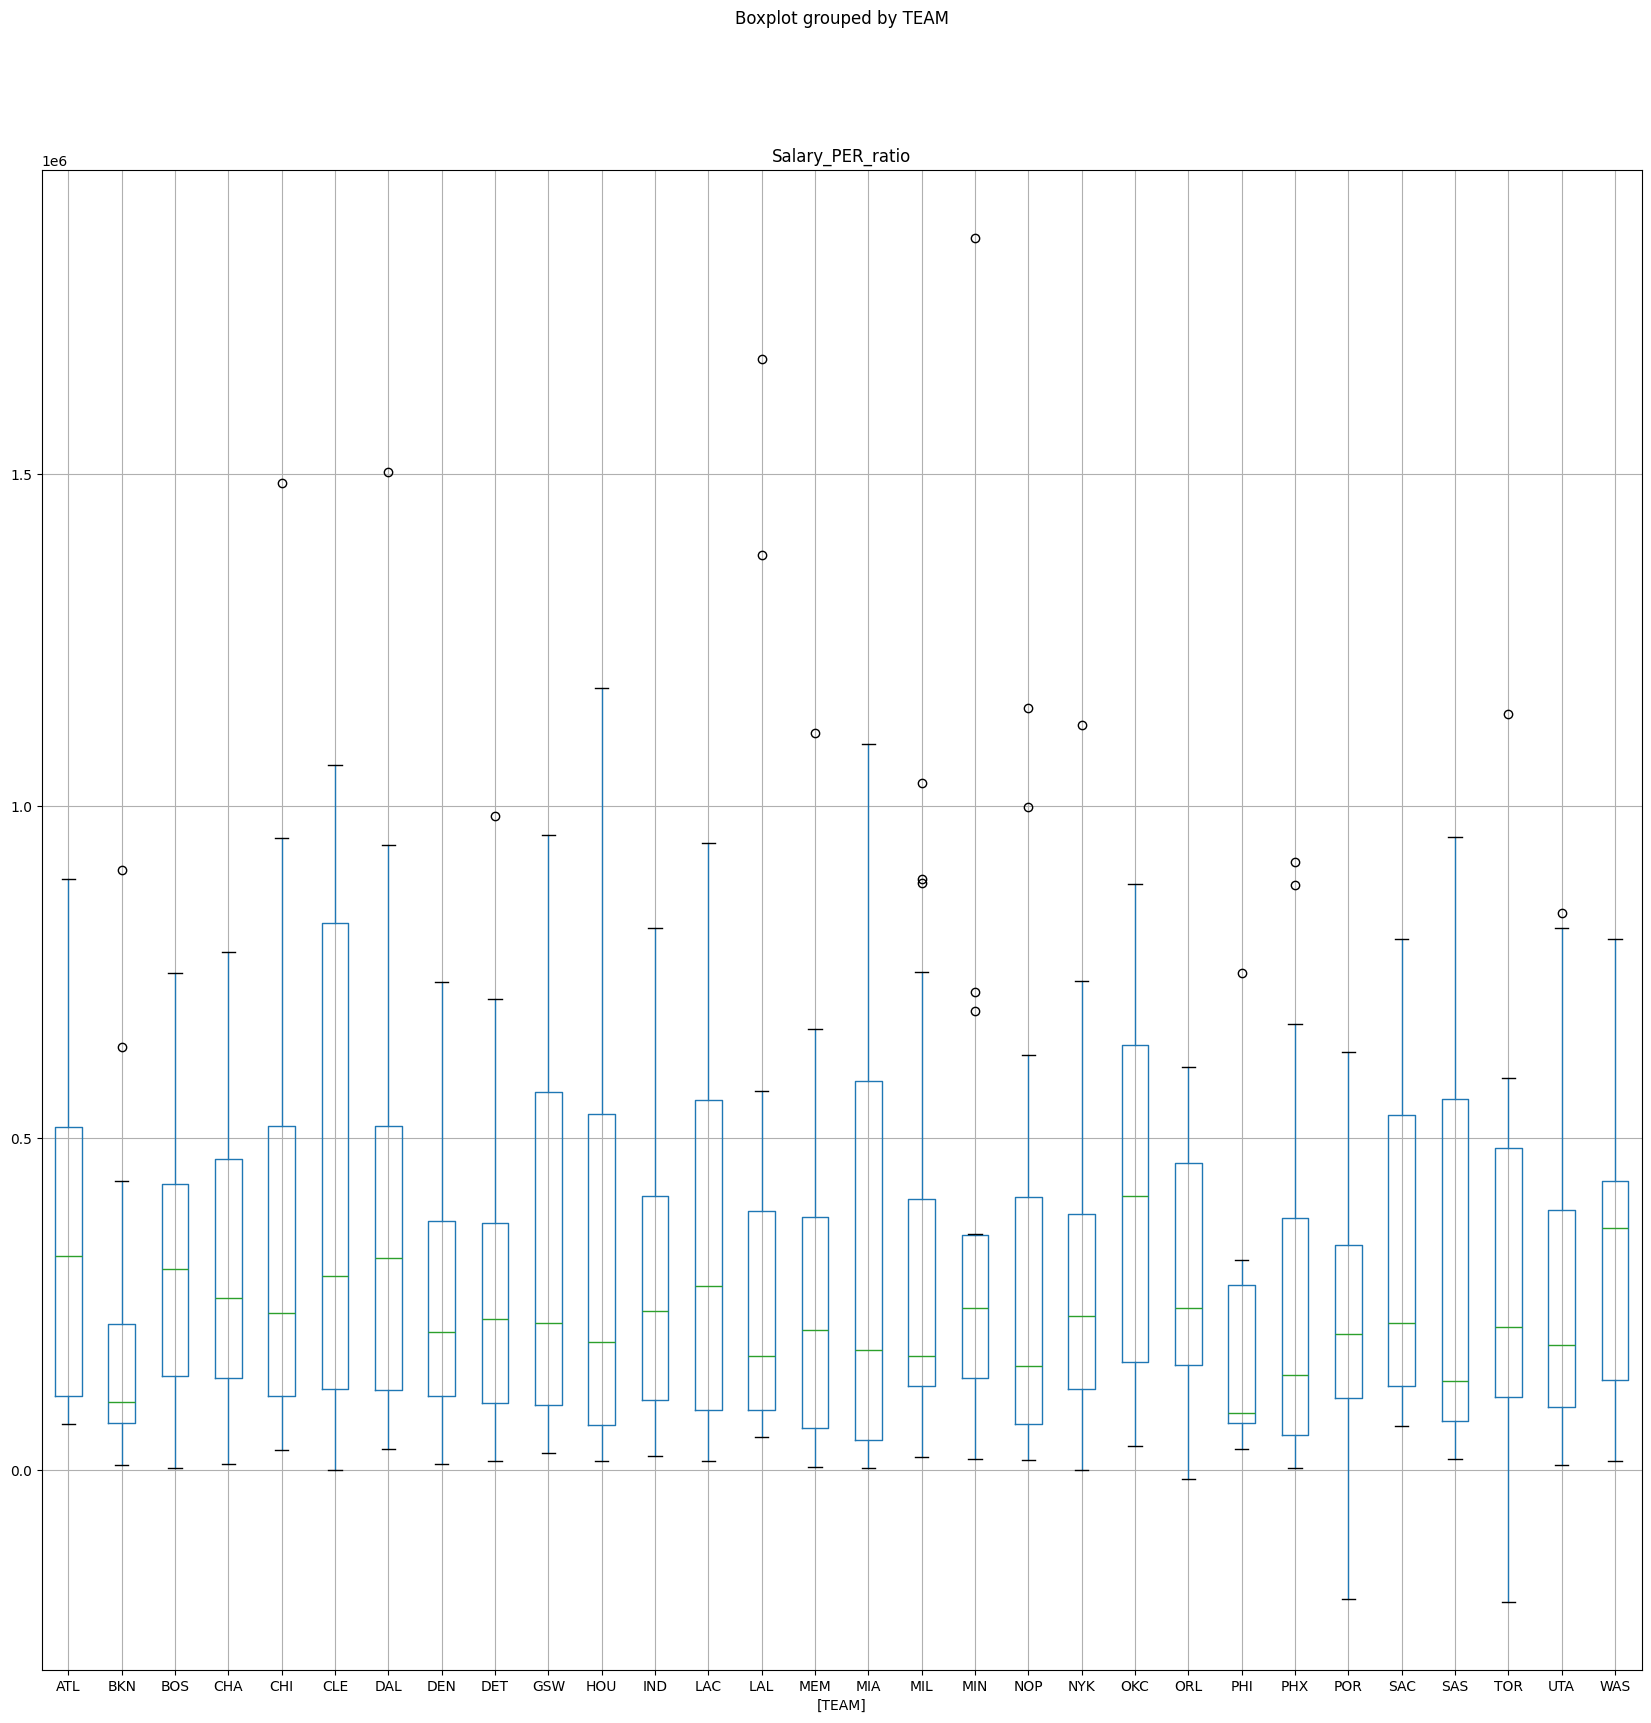

In [27]:
NBA[['Salary_PER_ratio', 'TEAM']].boxplot(by='TEAM', figsize=(20,20))